<a href="https://colab.research.google.com/github/mpsimina/mpsimina.github.io/blob/main/5/s5_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Binder](http://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/EconomicsObservatory/courses/HEAD?labpath=5%2Fs5_Scraping.ipynb)

<a href="https://colab.research.google.com/github/EconomicsObservatory/courses/blob/main/5/s5_Scraping.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

</br>
</br>

# Scraping HTML source (advanced)

Sometimes we want to access data that isn't as nicely formatted. For example:

- **Prices**: you might want data on a type of product or from a shop
- **Weather**: maybe you want to automate the collection of weather data from the Met office or weather.com
- **News and Media**: Scraping headlines and summaries can tell you about current affairs




In this example, we will scrape the Economics Observatory website to collect the latest article names and taglines to tell us about what is being reported.



 However, first, let's go through some basics for three tools:

 - `BeautifulSoup` which lets us search through and analyse HTML from the internet
 - `Pandas` which provides table-like objects we can use for analysis
 - `Counter` which let us count the occurence of items in a list



<br>
<br>
<br>
<br>
<br>

First, we'll need to import them.

In [1]:
import pandas as pd # for dataframes and data analysis
import requests # to download the web pages
from bs4 import BeautifulSoup # to parse the web pages
from collections import Counter # to count the words

# Using `BeautifulSoup` with our own Websites

<img src="https://raw.githubusercontent.com/FM-ds/ScrapingWorkshop/main/notebook_images/portfolio.png" width="600">

`BeautifulSoup` is a Python library for parsing `HTML` documents. We can use it to extract data from HTML we fetch from the web.
Today, we've written and modified `HTML` of our own.

</br>
</br>

## Inspect Element
Before we write any code, let's use `inspect element` to look at the structure of our pages. In Chrome, this is as simple as a right click (alternatively `ctrl-click` on mac) and `Inspect`.

<div style="display: flex; width: 60%">
  <img src="https://raw.githubusercontent.com/jhellingsdata/RADataHub/main/misc/Masterclass/section%205/images/inspect_element_portfolio.png" alt="First Image" style="width: 50%; height: auto; margin-right: 10px;">
  <img src="https://raw.githubusercontent.com/jhellingsdata/RADataHub/main/misc/Masterclass/section%205/images/inspect_element_full_portfolio.png" alt="Second Image" style="width: 50%; height: auto;">
</div>

<div>

<div>

</br>
</br>

Let's try investigating our own websites with `BeautifulSoup`.


In [4]:
website_url = "http://mpsimina.github.io" # TODO: Replace this with your URL
req = requests.get(website_url) # download the webpage
soup = BeautifulSoup(req.content, "lxml") # parse the webpage into an object that let's us navigate the HTML

</br>
<br>
<br>
<br>
<br>

### Investigating the Webpage
`soup` now contains a structured and interactive version of our website. We can take a look at it with `soup.prettify()`
<br>
<br>

In [5]:
print(soup.prettify())

<!-- This HTML file provides a simple example of a portfolio page. It contains a header, a few sections, and a few charts. -->
<!-- It works with the three css files in this folder: example1.css, example2.css and example3.css. -->
<!-- The HTML file defines the structure of the page, and the CSS files define how it looks. -->
<!-- The CSS examples are all designed to work with this page. Try swapping them out on line 29 and see what happens. -->
<!-- Take a look around and make your own copy to adapt for your own use. -->
<!-- This is a comment -->
<!-- Comments are not displayed in the browser -->
<!-- They can be used to leave notes in the code -->
<!DOCTYPE html>
<html>
 <!-- HTML is heirarchial: tags like this define elements on the page. 
    Each tag does something different. For example:
        - The <html> tag defines the whole document.
        - The <h1> tag defines a large heading
        - The <p> tag defines a paragraph
        - Tags appear as an opening <div> and closin

</br>
</br>

and search for elements. For example, we can search for every section title by searching for every `<h2>`

<br>
<br>

In [6]:
section_titles = soup.find_all("h2")
for title in section_titles:
    print(title.text)

Section 1: A basic chart
Section 2: Another Chart
Section 3: My chart!


<br>
<br>

or look elements with the class `big` - our main title, and `small` - our summary heading.

<br>
<br>

In [7]:
# find element with class="big"
soup.find(class_="big").text

' \n\r\n        New portfolio by me!\r\n        \r\n    '

In [8]:
soup.find(class_="small").text

' \r\n        This HTML file provides a simple template for a portfolio page. It contains a header, a few sections, and a few charts. This header can act as a summary for your page.\r\n    '

</br>
</br>
</br>

# Using `Pandas`

The second tool we'll use today is `Pandas`, a Python library used to work with datasets. It provides access to dataframes - tables we analyse with code.

Python already has a few built in data structures, for example lists and dictionaries:

In [9]:
london = {
    "name": "London",
    "population": 8308369,
    "area": 1572
} # This is an example of a dictionary

locations = [
    {
        "name": "London",
        "population": 8_982_000,
        "area": 606
    },
    {
        "name": "Newport",
        "population": 128_060,
        "area": 32.52
    },
    {
        "name": "Darlington",
        "population": 93_015,
        "area": 7.62
    },

]


<br>
<br>
<br>
<br>
Which we can turn into Pandas `dataframes`

In [10]:
df = pd.DataFrame(locations)
df

,name,population,area
0,London,8982000,606.00
1,Newport,128060,32.52
2,Darlington,93015,7.62


<br>
<br>
<br>
<br>

and manipulate in different ways.

For example, we can add a density column:

In [11]:
df['density'] = df['population'] / df['area']
df

,name,population,area,density
0,London,8982000,606.00,14821.782178
1,Newport,128060,32.52,3937.884379
2,Darlington,93015,7.62,12206.692913


or sort our dataframe

In [ ]:
sorted_df = df.sort_values(by="density", ascending=False)
sorted_df

,name,population,area,density
0,London,8982000,606.00,14821.782178
2,Darlington,93015,7.62,12206.692913
1,Newport,128060,32.52,3937.884379


</br>
</br>
</br>

</br>

# Using `Counter`

`Counter` is a module that's built in to python. It takes a list (or list-like object) and returns how many times each item occurs.

For example, if we have a list of fruit:

In [12]:
fruit = ["apple", "banana", "cherry", "apple", "cherry"]

we can use `Counter` to count how many times each occurs:

In [13]:
fruit_counts = Counter(fruit)
fruit_counts

Counter({'apple': 2, 'banana': 1, 'cherry': 2})

and we can combine this with `Pandas` by making a Dataframe from the counter:

In [14]:
pd.DataFrame(fruit_counts.items(), columns=["fruit", "count"])

,fruit,count
0,apple,2
1,banana,1
2,cherry,2


</br>
</br>
</br>

## Investigating the webpage

Before writing any code, let's take a look at the webpage.

<img
style="max-height: 250px;
    width: auto;" src="https://raw.githubusercontent.com/jhellingsdata/RADataHub/main/misc/Masterclass/section%205/images/eco_website.png"> </img>

We want to extract a list of article titles, such as "What do we know about labour market power in the UK?". To do this, we need to know where they appear in the HTML and how they are defined. By using inspect-element (right/ctrl click), we can see the HTML code that creates the titles.

<img
style="max-height: 250px;
    width: auto;" src="https://raw.githubusercontent.com/jhellingsdata/RADataHub/main/misc/Masterclass/section%205/images/inspect_element.png"> </img>

Here we can see that article titles have the class "home__blocks-item-title". We'll use this information to extract just the article titles.

Before we start writing code to scrape, we need to install and load the packages we need.

</br>
</br>
</br>
</br>


## Scraping the page

First, we'll download the HTML which defines the page, using the requests module.

In [16]:
req = requests.get("https://www.economicsobservatory.com") # Make a request to the ECO home-page
page_html = req.text # store the HTML in page_html
page_html

'<!DOCTYPE html>\n<html lang="en" class="">\n<head>\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <meta name="format-detection" content="telephone=no">\n    <meta http-equiv="X-UA-Compatible" content="ie=edge">\n    <title>Economics Observatory | Questions and answers about coronavirus and the UK economy</title>\n\n    <link rel="apple-touch-icon" sizes="180x180" href="https://www.economicsobservatory.com/wp-content/themes/economics-observatory/assets/images/favicons/apple-touch-icon.png?v=1">\n    <link rel="icon" type="image/png" sizes="32x32" href="https://www.economicsobservatory.com/wp-content/themes/economics-observatory/assets/images/favicons/favicon-32x32.png?v=1">\n    <link rel="icon" type="image/png" sizes="16x16" href="https://www.economicsobservatory.com/wp-content/themes/economics-observatory/assets/images/favicons/favicon-16x16.png?v=1">\n    <link rel="manifest" href="https://www.economicsobservatory.com/wp-

Now we have the page's source stored in {{page_html}}. Next we're going to use a module called BeautifulSoup to turn this text into a representation of the page we can interact with. We'll store this in a variable called {{soup}}.

In [17]:
soup = BeautifulSoup(page_html, 'html.parser') # Create a BeautifulSoup object to interact with the page's HTML

Now we'll look for article titles by searching for elements with the class "home__blocks-item-title" which we identified above.


In [18]:
article_title_elements = soup.find_all(class_="home__blocks-item-title") # Find all elements with the class "home__blocks-item-title"
article_title_elements

[<h3 class="home__blocks-item-title">How can the UK revive its ailing productivity?</h3>,
 <h3 class="home__blocks-item-title">What is the future of commuting to work?</h3>,
 <h3 class="home__blocks-item-title">Financing UK rail infrastructure: how does today compare with the past?</h3>,
 <h3 class="home__blocks-item-title">How has infrastructure been financed in the past?</h3>,
 <h3 class="home__blocks-item-title">Why have insurance premiums gone up so much?</h3>,
 <h3 class="home__blocks-item-title">Read the latest edition of our magazine here</h3>,
 <h3 class="home__blocks-item-title">How did UK small and medium-sized enterprises manage during the pandemic?</h3>,
 <h3 class="home__blocks-item-title">What is crowdfunding and how is it helping small businesses in the UK?</h3>,
 <h3 class="home__blocks-item-title" style="text-align: left;">Global support for abortion legalisation</h3>,
 <h3 class="home__blocks-item-title">How will the Covid-19 crisis affect the NHS?</h3>,
 <h3 class="h

We now have a list of HTML tags containing titles but all we care about is the text within them.

In [21]:

article_titles = [element.text for element in article_title_elements] # Extract the text from each element
article_titles

['How can the UK revive its ailing productivity?',
 'What is the future of commuting to work?',
 'Financing UK rail infrastructure: how does today compare with the past?',
 'How has infrastructure been financed in the past?',
 'Why have insurance premiums gone up so much?',
 'Read the latest edition of our magazine here',
 'How did UK small and medium-sized enterprises manage during the pandemic?',
 'What is crowdfunding and how is it helping small businesses in the UK?',
 'Global support for abortion legalisation',
 'How will the Covid-19 crisis affect the NHS?',
 'Ukraine’s accession to the European Union: what difference would it make?',
 'How does the government’s furlough scheme work?',
 'Will coronavirus accelerate the move towards a cashless economy?',
 'How is regional inequality affecting the UK’s economic performance?']

We also care about the taglines/'teasers' of each article.

These are contained in \<spans\> and \<p\> tags contained in divs with the class "home__blocks-item-teaser display"

In [19]:
# find all divs with the class "home__blocks-item-teaser display"
tagline_divs = soup.find_all(class_="home__blocks-item-teaser display")
# get all the <p> tags from the tagline_divs
taglines = [div.find("p") for div in tagline_divs]
# extract the text from each tag
tagline_texts = [tagline.text for tagline in taglines]
tagline_texts

['The UK’s poor productivity limits wage growth and better living standards. But the problem has no quick fixes. To boost productivity, policy-makers must establish and stick to a long-term strategy that includes diverse sectors – from technology and innovation to education, housing and transport.',
 'Stretched government balance sheets and elevated debt levels make it increasingly difficult to fund large-scale infrastructure projects. The first era of globalisation, 1880-1913 – when infrastructure bond issuances were a key means of financing such initiatives – offers valuable lessons for today.',
 'Higher insurance premiums for cars and homes are being driven by a mix of factors, including changing regulations, changing human behaviour and a changing climate. Insurers have to balance the need for adequate reserves for claims, maintained profitability and affordable coverage for consumers.',
 'Start-ups and smaller companies were disproportionately affected by the economic shock from C

</br>
</br>


And where from here?
We now have a list of articles, how could this be useful?

- **Automated News Roundups**: you could write code to collect news titles each day to produce a daily roundup
- **Sentiment Analysis**: If you scale up the data collection, you could perform [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis) to learn about the emotional valience of news stories.
</br>
</br>
</br>
</br>


### Making a Chart: Term Frequencies

Today, we can make a chart of term frequencies from the headlines. This will tell us about the topics covered by the website.

To do this, we will:

1. Define a list of common words to avoid (e.g. "the", "how", "should")
2. Work out how many times each word appears, excluding the common words
3. Save our data

</br>
</br>

#### 1: Make a long list of every word

In [22]:
word_list = [] # Create an empty list to store the words

article_titles_and_taglines = article_titles+tagline_texts # Combine the article titles and taglines into one list

for text in article_titles_and_taglines: # Loop through each article title and tagline
  words_in_text = text.split() # Split the text into words so we can loop through each word
  for word in words_in_text: # Loop through each word
    lowercase_word = word.lower() # Convert the word to lowercase
    word_excl_punc = lowercase_word.replace(".", "").replace(",", "").replace("?","") # Remove punctuation
    word_list.append(word_excl_punc) # Add the word to the word_list



</br>
</br>

#### 2: Count how many times each word appears
For this we'll use Counters, which take a list and return an object showing how many times each item appears

In [24]:
word_counter = Counter(word_list)

word_counter

Counter({'how': 8,
         'can': 1,
         'the': 31,
         'uk': 5,
         'revive': 1,
         'its': 1,
         'ailing': 1,
         'productivity': 3,
         'what': 4,
         'is': 5,
         'future': 2,
         'of': 15,
         'commuting': 1,
         'to': 14,
         'work': 2,
         'financing': 3,
         'rail': 1,
         'infrastructure:': 1,
         'does': 2,
         'today': 2,
         'compare': 1,
         'with': 2,
         'past': 2,
         'has': 4,
         'infrastructure': 3,
         'been': 1,
         'financed': 1,
         'in': 5,
         'why': 1,
         'have': 4,
         'insurance': 2,
         'premiums': 2,
         'gone': 1,
         'up': 2,
         'so': 1,
         'much': 1,
         'read': 1,
         'latest': 1,
         'edition': 1,
         'our': 1,
         'magazine': 1,
         'here': 1,
         'did': 1,
         'small': 3,
         'and': 24,
         'medium-sized': 1,
         'enterpris

</br>
</br>


#### 3: Making a table

We now have a counter showing word frequencies. Using **Pandas**, we can turn this into a more useful table.

In [25]:
df = pd.DataFrame(word_counter.items(), columns=["word", "count"])

sorted_df = df.sort_values(by="count", ascending=False)

sorted_df

,word,count
2,the,31
44,and,24
11,of,15
13,to,14
56,for,11
...,...,...
133,when,1
134,bond,1
135,issuances,1
137,key,1


from matplotlib import pyplot as plt
sorted_df['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sorted_df['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

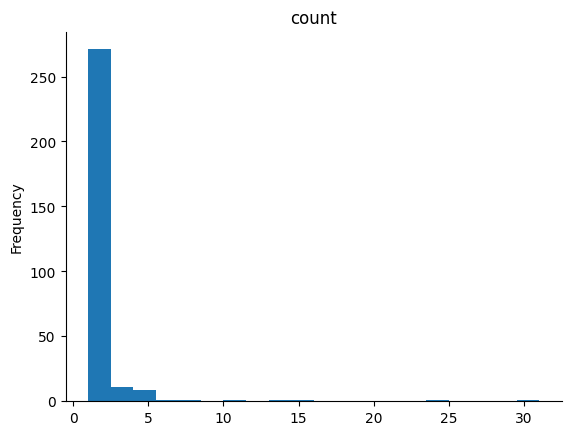

In [26]:
from matplotlib import pyplot as plt
sorted_df['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

</br>
</br>


#### 4: Filter out Common words

The most common words in our word_counter are common words: "the", "to", "a", etc.

We should filter these out so we can learn more about the articles.

Thankfully, lots of lists of common words exist already. We'll download a common word list and only keep the word that do not appear in it.

In [27]:
common_words = requests.get("https://raw.githubusercontent.com/6/stopwords-json/master/dist/en.json").json()

df_excl_common = sorted_df.query("word not in @common_words")

df_excl_common

,word,count
110,–,5
3,uk,5
104,long-term,3
7,productivity,3
24,infrastructure,3
...,...,...
132,1880-1913,1
134,bond,1
135,issuances,1
137,key,1


</br>
</br>


#### Saving Our Data

We now have a table of how often words appear in Economics Observatory headlines and taglines.
Let's keep the words that appear more than twice and save the table.

In [28]:
more_than_twice_df = df_excl_common.query("count >2")
more_than_twice_df.to_csv("s5_eco_words.csv", index=False)

more_than_twice_df

,word,count
110,–,5
3,uk,5
104,long-term,3
7,productivity,3
24,infrastructure,3
43,small,3
85,economic,3
154,changing,3
60,covid-19,3
15,financing,3
